### Data Dictionary 

1. age: age in years
2. sex: sex
      1 = male
      0 = female

3. cp: chest pain type
      Value 0: typical angina
      Value 1: atypical angina
      Value 2: non-anginal pain
      Value 3: asymptomatic

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5. chol: serum cholestoral in mg/dl

6. fbs: (fasting blood sugar > 120 mg/dl)
     1 = true;
     0 = false

7. restecg: resting electrocardiographic results

     Value 0: normal

     Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

     Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
     


8. thalach: maximum heart rate achieved

9. exang: exercise induced angina  
     1 = yes
     0 = no

10. oldpeak = ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment
    Value 0: upsloping
    Value 1: flat
    Value 2: downsloping

12. ca: number of major vessels (0-3) colored by flourosopy

13. thal:
    0 = error (in the original dataset 0 maps to NaN's)
    1 = fixed defect
    2 = normal
    3 = reversable defect

14. target (the lable):
    0 = no disease,
    1 = disease


### 1. Importing the Dependencies

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### 2. Load the Data

In [5]:
heart_data = pd.read_csv(r'C:\Users\Dhruv Rathi\Desktop\Imarticus\Projects\Heart Disease\heart_disease_data.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### 3.Data Preprocessing

In [7]:
#Checking the shape of the data
heart_data.shape

(303, 14)

In [8]:
#Checking for null values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 4. Data Visualization

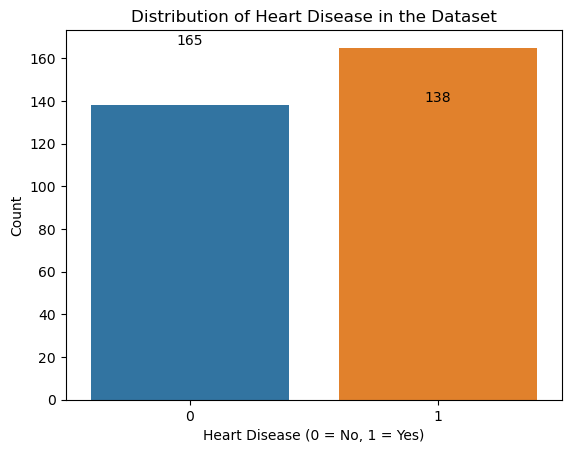

In [21]:
#Visualizing the count of healthy heart vs defected heart
sns.countplot(x='target', data = heart_data)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease in the Dataset')
counts = heart_data['target'].value_counts()
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, count, ha='center', va='bottom')

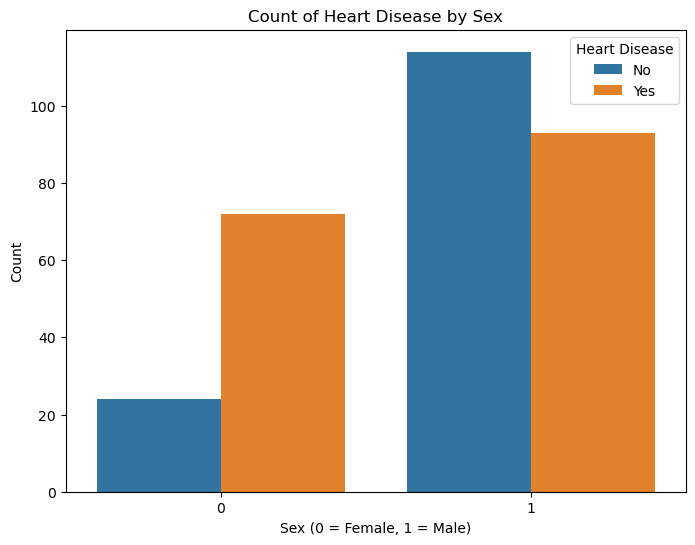

In [23]:
#To visualize the heart disease gender wise
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=heart_data)
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.title('Count of Heart Disease by Sex')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


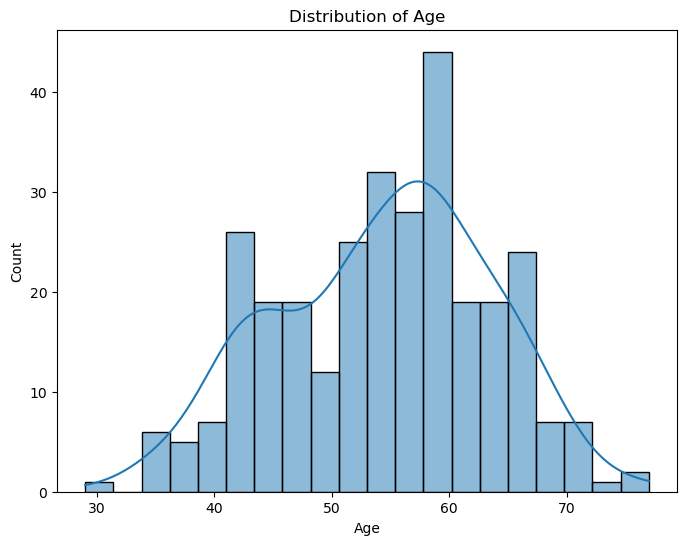

In [25]:
#To visualize the age distribution
plt.figure(figsize=(8, 6))
sns.histplot(heart_data['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()


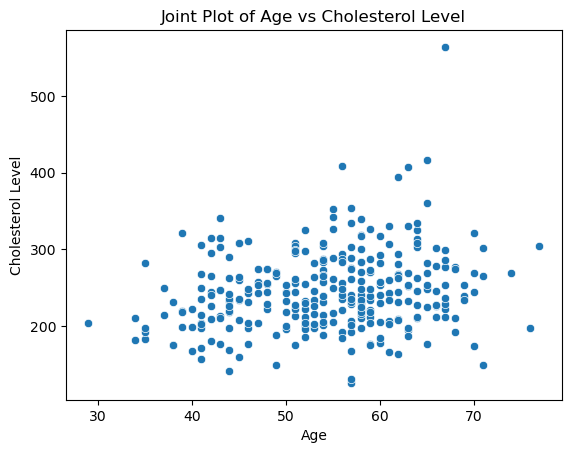

In [30]:
#To visualize age vs cholesterol level
sns.scatterplot(x='age', y='chol', data=heart_data)
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.title('Plot of Age vs Cholesterol Level')
plt.show()


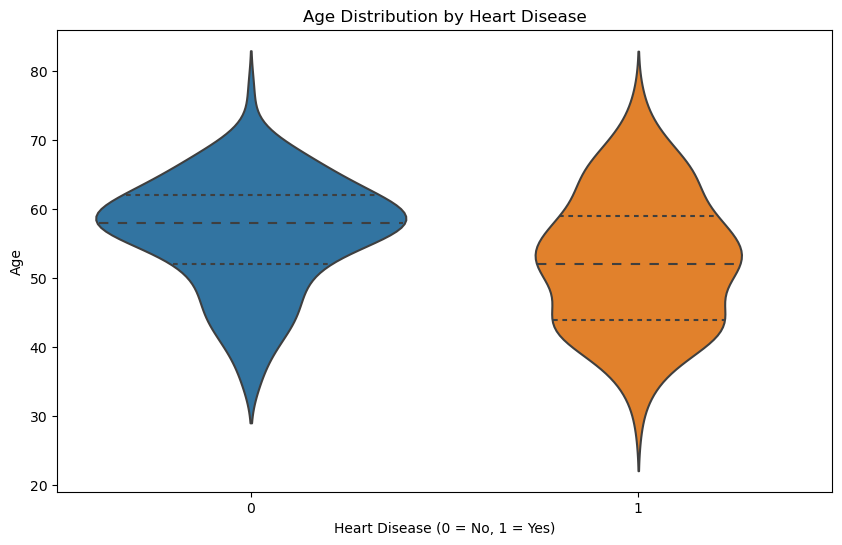

In [31]:
#To visualize the realtion between age vs heart disease
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='age', data=heart_data, inner='quartile')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.title('Age Distribution by Heart Disease')
plt.show()

### 5. Splitting the Data

In [32]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [33]:
print(X.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


In [34]:
print(Y.head())

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [35]:
#Splitting the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=10)  #Stratify=Y to ensure data is split proportionally(target)

In [36]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(242, 13)
(242,)
(61, 13)
(61,)


### 6. Training the Model

In [42]:
#Logistic Regression
lg = LogisticRegression()
lg.fit(X_train,Y_train)

Y_pred = lg.predict(X_test)


#Evaluation Matrix 

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[24  4]
 [ 3 30]]
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.90        33

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Accuracy of the model:  0.8852459016393442


C:\Users\Dhruv Rathi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
#DecisionTree Classifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

Y_pred = dt.predict(X_test)

#Evaluation Matrix 

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[19  9]
 [10 23]]
Classification report: 
              precision    recall  f1-score   support

           0       0.66      0.68      0.67        28
           1       0.72      0.70      0.71        33

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61

Accuracy of the model:  0.6885245901639344


In [47]:
#Support Vector Classifier
svm= SVC(kernel="rbf", gamma=0.1, C=1,random_state=10)
svm.fit(X_train,Y_train)

Y_pred = svm.predict(X_test)

#Evaluation Matrix 

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[ 0 28]
 [ 0 33]]
Classification report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.54      1.00      0.70        33

    accuracy                           0.54        61
   macro avg       0.27      0.50      0.35        61
weighted avg       0.29      0.54      0.38        61

Accuracy of the model:  0.5409836065573771


C:\Users\Dhruv Rathi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhruv Rathi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhruv Rathi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
#KNeighbors Classifier

knn= KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train,Y_train)

Y_pred = knn.predict(X_test)

#Evaluation Matrix 

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[18 10]
 [12 21]]
Classification report: 
              precision    recall  f1-score   support

           0       0.60      0.64      0.62        28
           1       0.68      0.64      0.66        33

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61

Accuracy of the model:  0.639344262295082


### The Logistic Regression Model is clearly out performing every other model, no other model is even coming closer to the accuracy achieved by the Logistic Regression model. I think so even if we tune the other models their acuuracy still wont even come close or match the accuracy of the Logistic Regression model

### 7. Trying to tune the model

In [48]:
dt = DecisionTreeClassifier(random_state=10) 
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
svm = SVC(kernel="rbf", gamma=0.1, C=90,random_state=10)
lg =LogisticRegression(multi_class="multinomial",random_state=10)

In [49]:
# now, create a list with the objects 
models= [dt, knn, svm, lg]

In [50]:
for model in models:
    model.fit(X_train, Y_train) # fit the model
    Y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(Y_test, Y_pred) 
    clf_report= classification_report(Y_test, Y_pred) 
    print(confusion_matrix(Y_test,Y_pred))
    print("The accuracy of the ",type(model).__name__, " model is ", accuracy*100 )
    print("Classification report:\n", clf_report)
    print("\n")

[[20  8]
 [ 8 25]]
The accuracy of the  DecisionTreeClassifier  model is  73.77049180327869
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71        28
           1       0.76      0.76      0.76        33

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



[[18 10]
 [12 21]]
The accuracy of the  KNeighborsClassifier  model is  63.934426229508205
Classification report:
               precision    recall  f1-score   support

           0       0.60      0.64      0.62        28
           1       0.68      0.64      0.66        33

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61



[[ 1 27]
 [ 0 33]]
The accuracy of the  SVC  model is  55.73770491803278
Classification report:
               

C:\Users\Dhruv Rathi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Though after tuning a model little , the accuracies of some model has imporved a bit , but still no model has even come closer to the performace of the base Logistic Regression model.